In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [68]:
import tweepy as tw
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from textblob import TextBlob
import argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk
import re

In [5]:
consumer_key = 'ZDWriZNLF060Jv0d4zPkVgYZP'
consumer_secret = 'z8wwwokv0IJdyqwm5skyYqK6pZaeX5qFM2nNPyWjr14zomDs3f'
access_token = '906991300699983872-Rh3yILsWr2EkgRDf5yTT3oiJfT9oBiK'
access_token_secret = 'dpczQ9ItRWTW5ygms6jgKZOrJJXx3rDqfJX5XsWM9diGW'

In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

In [7]:
#ENTRER SON NOM DE FICHIER '......... .csv'
file = open('the_art_of_war.csv', 'w',encoding='utf-8')
csvWriter = csv.writer(file)
#RECUPERE LES TWEETS CONTENANT LES MOTS (q=(".........", "......"))
for tweet in tw.Cursor(api.search,q=("the art of war", "read"), count = 100).items():
    #TWEET_CREATED_AT = RECUPERE LA DATE ; TWEET.TEXT = RECUPERE LE TEXTE DU TWEET
    csvWriter.writerow([tweet.created_at, tweet.text])
file.close()

In [8]:
#CREATION DU DATAFRAME (TABLEAU)
#pd.read_csv("entrer son nom de fichier.csv"), names = ['nom de colonne 1', 'nom de colonne 2']
df_art_of_war = pd.read_csv("the_art_of_war.csv", header = None, encoding='utf-8', names = ['Time', 'Tweets'])

In [9]:
#NECESSAIRE POUR CREER LE "NUAGE DE MOT"
df_art_of_war['Test'] = '2021'
#AFFICHER LE DATAFRAME (TABLEAU)
df_art_of_war

,Time,Tweets,Test
0,2021-07-13 07:25:24,RT @baba_Omoloro: BOOKS to READ: \r\n\r\nArt...,2021
1,2021-07-13 07:23:12,@conormahood Not a fun read by any means but w...,2021
2,2021-07-13 07:09:51,RT @medikalife: Want to know the secret of rea...,2021
3,2021-07-13 06:25:14,RT @baba_Omoloro: BOOKS to READ: \r\n\r\nArt...,2021
4,2021-07-13 06:00:24,@opdroid1234 I read Chinese harnessed super q...,2021
...,...,...,...
830,2021-07-05 14:56:31,@defilibrator Awesome! I’ve only read the auto...,2021
831,2021-07-05 13:47:03,Download PDF〈The Art of War Landmark Edition b...,2021
832,2021-07-05 12:27:25,RT @wealth_director: 4 Books that every entrep...,2021
833,2021-07-05 11:51:14,RT @wealth_director: 4 Books that every entrep...,2021


In [19]:
#NETTOYAGE !
#SUPPRIMER TOUS LES DOUBLONS DE LA COLONNE 'TWEETS'
df_art_of_war = df_art_of_war.drop_duplicates(subset=['Tweets'])
#SUPPRIMER TOUS LES '@'
df_art_of_war.Tweets = df_art_of_war.Tweets.str.replace('@', '')
#SUPPRIMER TOUS LES 'RT'
df_art_of_war.Tweets = df_art_of_war.Tweets.str.replace('RT', '')
#SUPPRIMER LES LIENS
def remove_punct(text):
    text = re.sub("(@[A-Za-z0–9]+)|[^\w\s]|#|http\S+","", text)
    return text

df_art_of_war['Tweets'] = df_art_of_war['Tweets'].apply(lambda x: remove_punct(x))
#AFFICHER LE DATAFRAME (TABLEAU) NETTOYES
df_art_of_war

,Time,Tweets,Test,bigrams
0,2021-07-13 07:25:24,baba_Omoloro BOOKS to READ \r\n\r\nArt of W...,2021,"[(, baba_Omoloro:), (baba_Omoloro:, BOOKS), (B..."
1,2021-07-13 07:23:12,conormahood Not a fun read by any means but wi...,2021,"[(conormahood, Not), (Not, a), (a, fun), (fun,..."
2,2021-07-13 07:09:51,medikalife Want to know the secret of real ef...,2021,"[(, medikalife:), (medikalife:, Want), (Want, ..."
4,2021-07-13 06:00:24,opdroid1234 I read Chinese harnessed super qu...,2021,"[(opdroid1234, ), (, I), (I, read), (read, Chi..."
5,2021-07-13 05:57:16,some of yall havent read sun tzus the art of w...,2021,"[(some, of), (of, yall), (yall, haven't), (hav..."
...,...,...,...,...
828,2021-07-05 16:48:07,Russmufc26 Zar_RedIssue BPete1970 I was biggin...,2021,"[(Russmufc26, Zar_RedIssue), (Zar_RedIssue, BP..."
829,2021-07-05 15:57:50,TiffanyEngr RonSarmiento21 JeffTay68778958 Les...,2021,"[(TiffanyEngr, RonSarmiento21), (RonSarmiento2..."
830,2021-07-05 14:56:31,defilibrator Awesome Ive only read the autobio...,2021,"[(defilibrator, Awesome!), (Awesome!, I’ve), (..."
831,2021-07-05 13:47:03,Download PDFThe Art of War Landmark Edition by...,2021,"[(Download, PDF〈The), (PDF〈The, Art), (Art, of..."


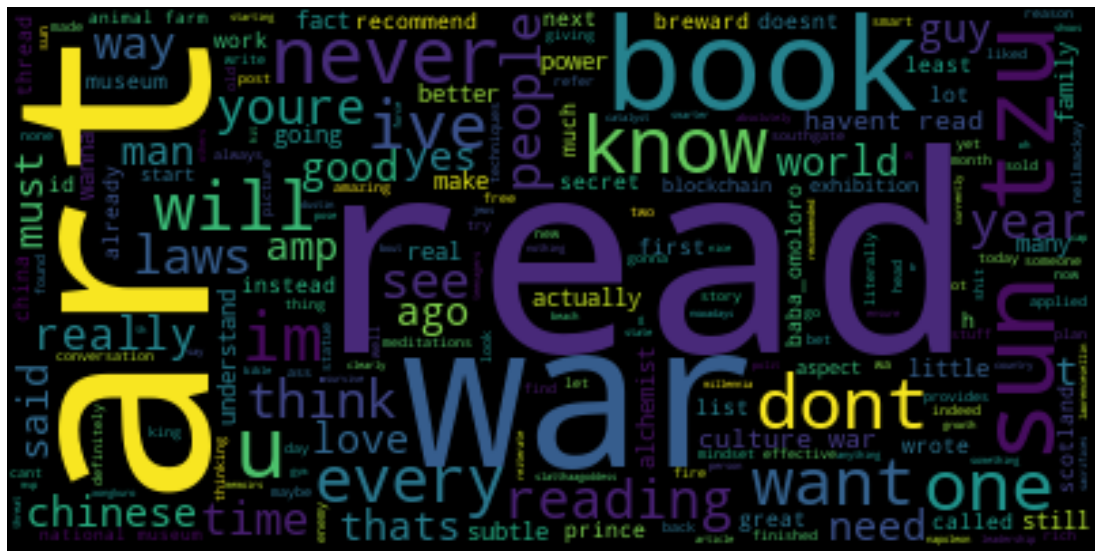

In [21]:
#CREER UNE LISTE DE LA TOTALITE DES TWEETS MOT PAR MOT
#saDataFrame[saDataFrame.ColonneTest.].colonneDesTweets
text = df_art_of_war[df_art_of_war.Test=='2021'].Tweets.tolist() 

#METTRE TOUS LES MOTS EN MINUSCULE
text = ' '.join(text).lower()

#CODE POUR LE NUAGE DE MOTS
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#AFFICHER LE NUAGE DE MOTS
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [12]:
#GENERATION DES BIGRAMMES
text = df_art_of_war[df_art_of_war.Test=='2021'].Tweets.tolist()
text2 = [[Word for Word in line.split()] for line in text]
bigrams = nltk.bigrams(text2)
print(bigrams)

<generator object bigrams at 0x000001C5BB4FC820>


In [13]:
#CREATION D'UN DATAFRAME CONTENANT LES BIGRAMMES
from nltk.util import ngrams

df_art_of_war['bigrams'] = df_art_of_war['Tweets'].apply(lambda row: list(nltk.bigrams(row.split(' '))))
#AFFICHER LES PREMIERS DE LA LISTE
df_art_of_war['bigrams'].head()

<ipython-input-13-18b81ff8d972>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_art_of_war['bigrams'] = df_art_of_war['Tweets'].apply(lambda row: list(nltk.bigrams(row.split(' '))))


0    [(, baba_Omoloro:), (baba_Omoloro:, BOOKS), (B...
1    [(conormahood, Not), (Not, a), (a, fun), (fun,...
2    [(, medikalife:), (medikalife:, Want), (Want, ...
4    [(opdroid1234, ), (, I), (I, read), (read, Chi...
5    [(some, of), (of, yall), (yall, haven't), (hav...
Name: bigrams, dtype: object

In [94]:
#CREATION D'UN TABLEAU FREQUENCE/TRIGRAMMES
from sklearn.feature_extraction.text import CountVectorizer

#ngram_range= (2,2)Pour les bigrammes, (2,3)Pour les bigrammes et trigrammes, (3,3)Pour les trigrammes
c_vec = CountVectorizer(ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_art_of_war['Tweets'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram_art_of_war = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})
df_ngram_art_of_war = df_ngram_art_of_war.head(25)
df_ngram_art_of_war

,frequency,trigram
0,124,art of war
1,116,the art of
2,64,read the art
3,11,to read the
4,10,of war by
5,10,by sun tzu
6,9,war by sun
7,9,of war and
8,8,war of art
9,7,the war of


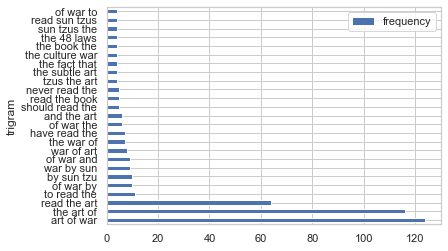

In [96]:
art_of_war_bplot = pd.DataFrame(df_ngram_art_of_war)
ax = art_of_war_bplot.plot.barh(x='trigram', y='frequency', rot=0)

In [99]:
#ENTRER SON NOM DE FICHIER '......... .csv'
file = open('the_song_of_achille.csv', 'w',encoding='utf-8')
csvWriter = csv.writer(file)
#RECUPERE LES TWEETS CONTENANT LES MOTS (q=(".........", "......"))
for tweet in tw.Cursor(api.search,q=('"The Song of Achilles"'), count = 100).items():
    #TWEET_CREATED_AT = RECUPERE LA DATE ; TWEET.TEXT = RECUPERE LE TEXTE DU TWEET
    csvWriter.writerow([tweet.created_at, tweet.text])
file.close()

In [100]:
#CREATION DU DATAFRAME (TABLEAU)
#pd.read_csv("entrer son nom de fichier.csv"), names = ['nom de colonne 1', 'nom de colonne 2']
df_song_of_achille = pd.read_csv("the_song_of_achille.csv", header = None, encoding='utf-8', names = ['Time', 'Tweets'])

In [101]:
#NECESSAIRE POUR CREER LE "NUAGE DE MOT"
df_song_of_achille['Test'] = '2021'
#AFFICHER LE DATAFRAME (TABLEAU)
df_song_of_achille

,Time,Tweets,Test
0,2021-07-13 09:57:51,jsuis une pute si j’me fais pas tatouer une qu...,2021
1,2021-07-13 09:51:03,RT @mirandaa__r: hii I’m not so new to #booktw...,2021
2,2021-07-13 09:49:49,MY TEACHER JUST SAW MY HOME SCREEN AND SAID : ...,2021
3,2021-07-13 09:41:50,RT @QU1LL1NK: the song of achilles ...,2021
4,2021-07-13 09:37:26,RT @daphcarstairs: hey! i’m trying to get more...,2021
...,...,...,...
2238,2021-07-05 10:45:29,The song of Achilles book is toooooo good I wi...,2021
2239,2021-07-05 10:41:39,i need people to stop praising the song of ach...,2021
2240,2021-07-05 10:39:21,"@PeeTeestudent the house in the cerulean sea, ...",2021
2241,2021-07-05 10:36:27,capekkk baca the song of achilles bikin geregetan,2021


In [102]:
#NETTOYAGE !
#SUPPRIMER TOUS LES DOUBLONS DE LA COLONNE 'TWEETS'
df_song_of_achille = df_song_of_achille.drop_duplicates(subset=['Tweets'])
#SUPPRIMER TOUS LES '@'
df_song_of_achille.Tweets = df_song_of_achille.Tweets.str.replace('@', '')
#SUPPRIMER TOUS LES 'RT'
df_song_of_achille.Tweets = df_song_of_achille.Tweets.str.replace('RT', '')
#SUPPRIMER LES LIENS
def remove_punct(text):
    text = re.sub("(@[A-Za-z0–9]+)|[^\w\s]|#|http\S+","", text)
    return text

df_song_of_achille['Tweets'] = df_song_of_achille['Tweets'].apply(lambda x: remove_punct(x))
#AFFICHER LE DATAFRAME (TABLEAU) NETTOYES
df_song_of_achille

C:\Users\simplon\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-102-69fc03f13970>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_song_of_achille['Tweets'] = df_song_of_achille['Tweets'].apply(lambda x: remove_punct(x))


,Time,Tweets,Test
0,2021-07-13 09:57:51,jsuis une pute si jme fais pas tatouer une quo...,2021
1,2021-07-13 09:51:03,mirandaa__r hii Im not so new to booktwt but ...,2021
2,2021-07-13 09:49:49,MY TEACHER JUST SAW MY HOME SCREEN AND SAID I...,2021
3,2021-07-13 09:41:50,QU1LL1NK the song of achilles th...,2021
4,2021-07-13 09:37:26,daphcarstairs hey im trying to get more bookt...,2021
...,...,...,...
2238,2021-07-05 10:45:29,The song of Achilles book is toooooo good I wi...,2021
2239,2021-07-05 10:41:39,i need people to stop praising the song of ach...,2021
2240,2021-07-05 10:39:21,PeeTeestudent the house in the cerulean sea fl...,2021
2241,2021-07-05 10:36:27,capekkk baca the song of achilles bikin geregetan,2021


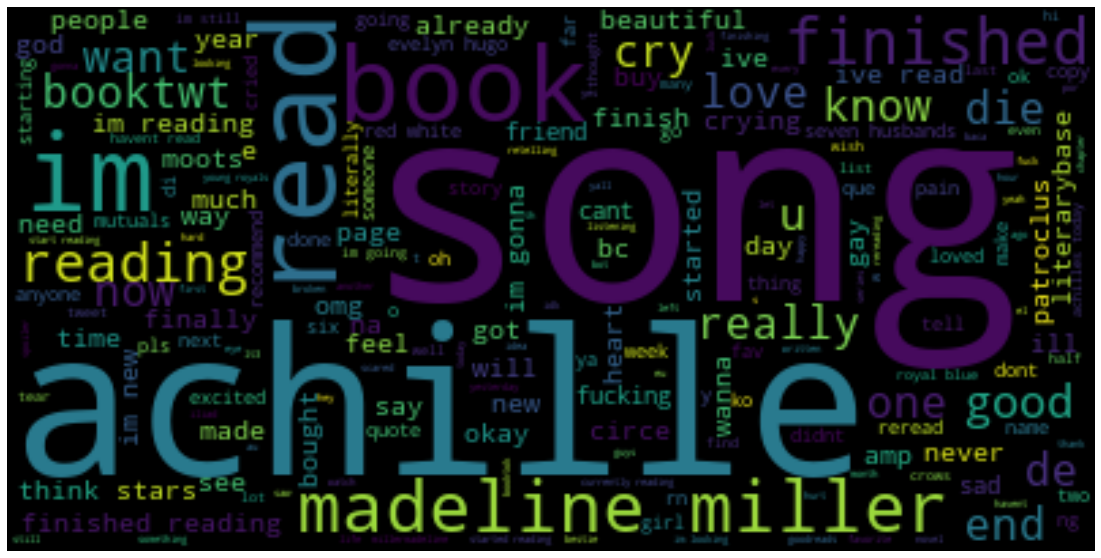

In [103]:
#CREER UNE LISTE DE LA TOTALITE DES TWEETS MOT PAR MOT
#saDataFrame[saDataFrame.ColonneTest.].colonneDesTweets
text = df_song_of_achille[df_song_of_achille.Test=='2021'].Tweets.tolist() 

#METTRE TOUS LES MOTS EN MINUSCULE
text = ' '.join(text).lower()

#CODE POUR LE NUAGE DE MOTS
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#AFFICHER LE NUAGE DE MOTS
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [104]:
#CREATION D'UN TABLEAU FREQUENCE/TRIGRAMMES
from sklearn.feature_extraction.text import CountVectorizer

#ngram_range= (2,2)Pour les bigrammes, (2,3)Pour les bigrammes et trigrammes, (3,3)Pour les trigrammes
c_vec = CountVectorizer(ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_song_of_achille['Tweets'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram_achille = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})
df_ngram_achille = df_ngram_achille.head(25)
df_ngram_achille

,frequency,trigram
0,1526,the song of
1,1498,song of achilles
2,165,reading the song
3,158,of achilles and
4,135,read the song
5,120,of achilles by
6,116,by madeline miller
7,111,achilles by madeline
8,102,finished the song
9,65,of achilles is


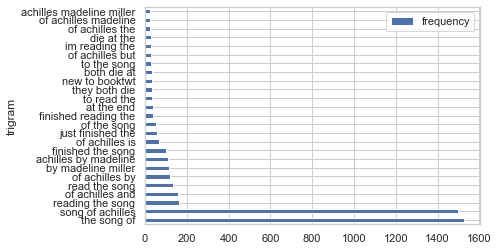

In [105]:
achille_bplot = pd.DataFrame(df_ngram_achille)
ax = achille_bplot.plot.barh(x='trigram', y='frequency', rot=0)

In [50]:
#ENTRER SON NOM DE FICHIER '......... .csv'
file = open('batman.csv', 'w',encoding='utf-8')
csvWriter = csv.writer(file)
#RECUPERE LES TWEETS CONTENANT LES MOTS (q=(".........", "......"))
for tweet in tw.Cursor(api.search,q=("batman", "book"), count = 100).items():
    #TWEET_CREATED_AT = RECUPERE LA DATE ; TWEET.TEXT = RECUPERE LE TEXTE DU TWEET
    csvWriter.writerow([tweet.created_at, tweet.text])
file.close()

#CREATION DU DATAFRAME (TABLEAU)
#pd.read_csv("entrer son nom de fichier.csv"), names = ['nom de colonne 1', 'nom de colonne 2']
df_batman = pd.read_csv("batman.csv", header = None, encoding='utf-8', names = ['Time', 'Tweets'])

#NECESSAIRE POUR CREER LE "NUAGE DE MOT"
df_batman['Test'] = '2021'
#AFFICHER LE DATAFRAME (TABLEAU)
df_batman

,Time,Tweets,Test
0,2021-07-13 08:09:44,RT @ilbutman: Batman’s Latest Mission Proves W...,2021
1,2021-07-13 07:58:36,Batman’s Latest Mission Proves What Nightwing ...,2021
2,2021-07-13 07:55:42,Lütfullah Selçuk Batman - Mount Erciyes (Turke...,2021
3,2021-07-13 07:51:59,RT @deadeyebrakeman: If you guys are disappoin...,2021
4,2021-07-13 07:22:51,This weeks Book(ish) I chat with Dean Gunera a...,2021
...,...,...,...
2031,2021-07-05 10:59:16,RT @igdceu: Batman v Superman is the best comi...,2021
2032,2021-07-05 10:56:09,"RT @EdPiskor: Holy Gaussian Blur, Batman! Stra...",2021
2033,2021-07-05 10:52:03,RT @igdceu: Batman v Superman is the best comi...,2021
2034,2021-07-05 10:38:46,RT @igdceu: Batman v Superman is the best comi...,2021


In [51]:
#NETTOYAGE !
#SUPPRIMER TOUS LES DOUBLONS DE LA COLONNE 'TWEETS'
df_batman = df_batman.drop_duplicates(subset=['Tweets'])
#SUPPRIMER TOUS LES '@'
df_batman.Tweets = df_batman.Tweets.str.replace('@', '')
#SUPPRIMER TOUS LES 'RT'
df_batman.Tweets = df_batman.Tweets.str.replace('RT', '')
#SUPPRIMER LES LIENS
def remove_punct(text):
    text = re.sub("(@[A-Za-z0–9]+)|[^\w\s]|#|http\S+","", text)
    return text

df_batman['Tweets'] = df_batman['Tweets'].apply(lambda x: remove_punct(x))
#AFFICHER LE DATAFRAME (TABLEAU) NETTOYES
df_batman

C:\Users\simplon\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-51-74dcefdeb2ef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batman['Tweets'] = df_batman['Tweets'].apply(lambda x: remove_punct(x))


,Time,Tweets,Test
0,2021-07-13 08:09:44,ilbutman Batmans Latest Mission Proves What N...,2021
1,2021-07-13 07:58:36,Batmans Latest Mission Proves What Nightwing D...,2021
2,2021-07-13 07:55:42,Lütfullah Selçuk Batman Mount Erciyes Turkey ...,2021
3,2021-07-13 07:51:59,deadeyebrakeman If you guys are disappointed ...,2021
4,2021-07-13 07:22:51,This weeks Bookish I chat with Dean Gunera abo...,2021
...,...,...,...
2011,2021-07-05 13:05:59,Went into a comic book shop planning to buy so...,2021
2012,2021-07-05 13:00:56,Detective Comics DC 359 Jan 1967 Batman Batgir...,2021
2016,2021-07-05 12:16:58,GregCapullo OMartell__ Your Batman run is what...,2021
2027,2021-07-05 11:04:29,KurisuM4 ThrawnOfficial Nerdrotics aTIEDefende...,2021


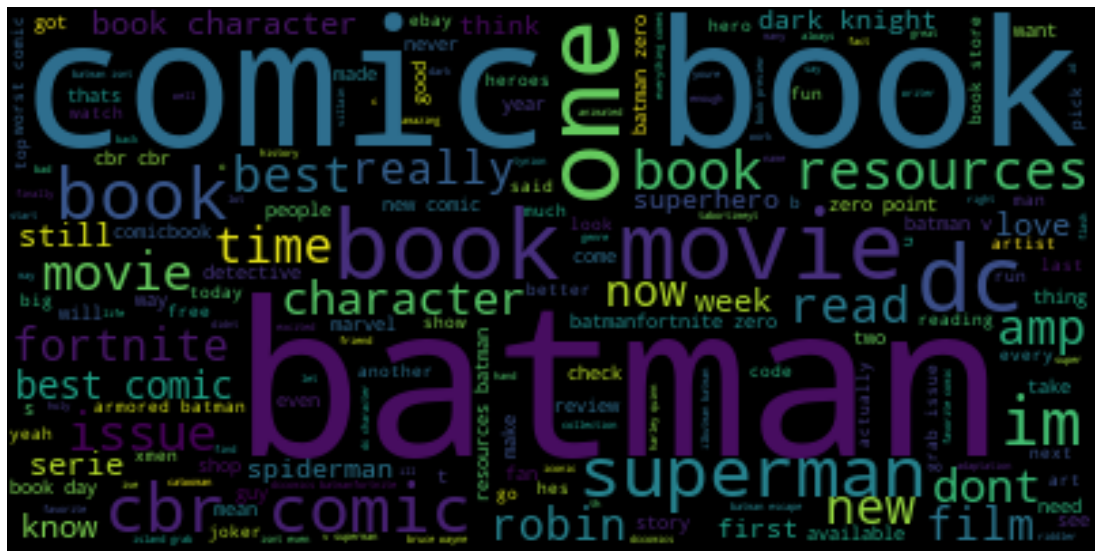

In [52]:
#CREER UNE LISTE DE LA TOTALITE DES TWEETS MOT PAR MOT
#saDataFrame[saDataFrame.ColonneTest.].colonneDesTweets
text = df_batman[df_batman.Test=='2021'].Tweets.tolist() 

#METTRE TOUS LES MOTS EN MINUSCULE
text = ' '.join(text).lower()

#CODE POUR LE NUAGE DE MOTS
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#AFFICHER LE NUAGE DE MOTS
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [90]:
#CREATION D'UN TABLEAU FREQUENCE/TRIGRAMMES
from sklearn.feature_extraction.text import CountVectorizer

#ngram_range= (2,2)Pour les bigrammes, (2,3)Pour les bigrammes et trigrammes, (3,3)Pour les trigrammes
c_vec = CountVectorizer(ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_batman['Tweets'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram_batman = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})
df_ngram_batman = df_ngram_batman.head(25)
df_ngram_batman

,frequency,trigram
0,47,comic book resources
1,47,cbr comic book
2,37,the comic book
3,31,comic book movie
4,30,comic book movies
5,27,one of the
6,27,best comic book
7,21,the dark knight
8,21,the best comic
9,21,of all time


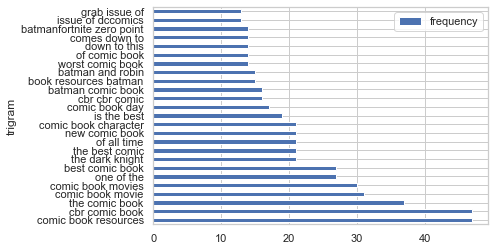

In [91]:
batman_bplot = pd.DataFrame(df_ngram_batman)
ax = batman_bplot.plot.barh(x='trigram', y='frequency', rot=0)

In [55]:
#ENTRER SON NOM DE FICHIER '......... .csv'
file = open('picture_dorian_gray.csv', 'w',encoding='utf-8')
csvWriter = csv.writer(file)
#RECUPERE LES TWEETS CONTENANT LES MOTS (q=(".........", "......"))
for tweet in tw.Cursor(api.search,q=("picture of dorian gray"), count = 100).items():
    #TWEET_CREATED_AT = RECUPERE LA DATE ; TWEET.TEXT = RECUPERE LE TEXTE DU TWEET
    csvWriter.writerow([tweet.created_at, tweet.text])
file.close()

#CREATION DU DATAFRAME (TABLEAU)
#pd.read_csv("entrer son nom de fichier.csv"), names = ['nom de colonne 1', 'nom de colonne 2']
df_dorian_gray = pd.read_csv("picture_dorian_gray.csv", header = None, encoding='utf-8', names = ['Time', 'Tweets'])

#NECESSAIRE POUR CREER LE "NUAGE DE MOT"
df_dorian_gray['Test'] = '2021'
#AFFICHER LE DATAFRAME (TABLEAU)
df_dorian_gray

,Time,Tweets,Test
0,2021-07-13 08:19:58,RT @fireplacewitch: i want new moots! im cool ...,2021
1,2021-07-13 08:13:04,RT @fireplacewitch: i want new moots! im cool ...,2021
2,2021-07-13 07:30:38,starting picture of dorian gray I hope it’s go...,2021
3,2021-07-13 06:53:52,RT @fireplacewitch: i want new moots! im cool ...,2021
4,2021-07-13 06:15:31,RT @Lauren66793666: #OTD 1996 – Pandro S. Berm...,2021
...,...,...,...
832,2021-07-05 12:46:06,RT @ganseylalablue: so my copy of the picture ...,2021
833,2021-07-05 12:45:23,so my copy of the picture of Dorian Gray had a...,2021
834,2021-07-05 12:05:32,RT @BooksStoryline: Ten great lines from novel...,2021
835,2021-07-05 11:37:10,crush just called the picture of dorian gray “...,2021


In [56]:
#NETTOYAGE !
#SUPPRIMER TOUS LES DOUBLONS DE LA COLONNE 'TWEETS'
df_dorian_gray = df_dorian_gray.drop_duplicates(subset=['Tweets'])
#SUPPRIMER TOUS LES '@'
df_dorian_gray.Tweets = df_dorian_gray.Tweets.str.replace('@', '')
#SUPPRIMER TOUS LES 'RT'
df_dorian_gray.Tweets = df_dorian_gray.Tweets.str.replace('RT', '')
#SUPPRIMER LES LIENS
def remove_punct(text):
    text = re.sub("(@[A-Za-z0–9]+)|[^\w\s]|#|http\S+","", text)
    return text

df_dorian_gray['Tweets'] = df_dorian_gray['Tweets'].apply(lambda x: remove_punct(x))
#AFFICHER LE DATAFRAME (TABLEAU) NETTOYES
df_dorian_gray

C:\Users\simplon\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-56-7cf0c5f0c8e0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dorian_gray['Tweets'] = df_dorian_gray['Tweets'].apply(lambda x: remove_punct(x))


,Time,Tweets,Test
0,2021-07-13 08:19:58,fireplacewitch i want new moots im cool with ...,2021
2,2021-07-13 07:30:38,starting picture of dorian gray I hope its good,2021
4,2021-07-13 06:15:31,Lauren66793666 OTD 1996 Pandro S Berman Aged...,2021
5,2021-07-13 05:41:14,The Picture of Dorian Gray\r\nambageni,2021
7,2021-07-13 05:05:53,BooksStoryline Ten great lines from novels Th...,2021
...,...,...,...
830,2021-07-05 13:18:47,tooinloveswift כמה עלה לך the picture of doria...,2021
831,2021-07-05 13:10:21,also this is from the picture of dorian gray b...,2021
833,2021-07-05 12:45:23,so my copy of the picture of Dorian Gray had a...,2021
835,2021-07-05 11:37:10,crush just called the picture of dorian gray m...,2021


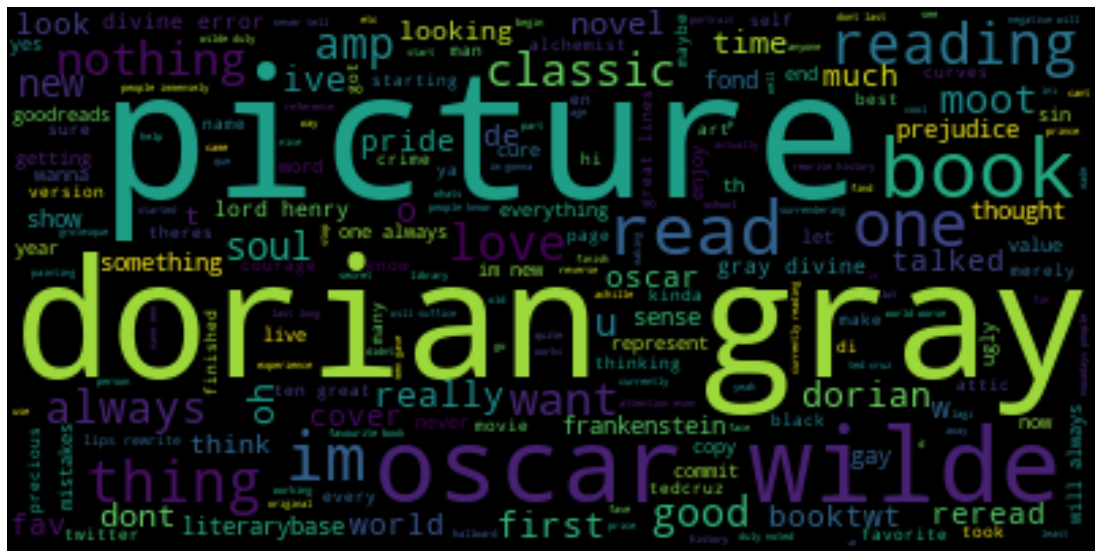

In [57]:
#CREER UNE LISTE DE LA TOTALITE DES TWEETS MOT PAR MOT
#saDataFrame[saDataFrame.ColonneTest.].colonneDesTweets
text = df_dorian_gray[df_dorian_gray.Test=='2021'].Tweets.tolist() 

#METTRE TOUS LES MOTS EN MINUSCULE
text = ' '.join(text).lower()

#CODE POUR LE NUAGE DE MOTS
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#AFFICHER LE NUAGE DE MOTS
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [88]:
#CREATION D'UN TABLEAU FREQUENCE/TRIGRAMMES
from sklearn.feature_extraction.text import CountVectorizer

#ngram_range= (2,2)Pour les bigrammes, (2,3)Pour les bigrammes et trigrammes, (3,3)Pour les trigrammes
c_vec = CountVectorizer(ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_dorian_gray['Tweets'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram_dorian_gray = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})
df_ngram_dorian_gray = df_ngram_dorian_gray.head(25)
df_ngram_dorian_gray

,frequency,trigram
0,354,picture of dorian
1,350,of dorian gray
2,300,the picture of
3,33,oscar wilde the
4,28,wilde the picture
5,28,dorian gray by
6,27,by oscar wilde
7,26,gray by oscar
8,17,read the picture
9,16,of the picture


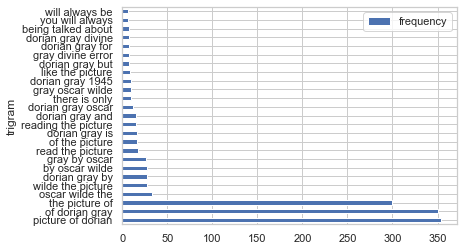

In [89]:
dorian_gray_bplot = pd.DataFrame(df_ngram_dorian_gray)
ax = dorian_gray_bplot.plot.barh(x='trigram', y='frequency', rot=0)

In [59]:
#ENTRER SON NOM DE FICHIER '......... .csv'
file = open('book_thief.csv', 'w',encoding='utf-8')
csvWriter = csv.writer(file)
#RECUPERE LES TWEETS CONTENANT LES MOTS (q=(".........", "......"))
for tweet in tw.Cursor(api.search,q=("the book thief"), count = 100).items():
    #TWEET_CREATED_AT = RECUPERE LA DATE ; TWEET.TEXT = RECUPERE LE TEXTE DU TWEET
    csvWriter.writerow([tweet.created_at, tweet.text])
file.close()

#CREATION DU DATAFRAME (TABLEAU)
#pd.read_csv("entrer son nom de fichier.csv"), names = ['nom de colonne 1', 'nom de colonne 2']
df_book_thief = pd.read_csv("book_thief.csv", header = None, encoding='utf-8', names = ['Time', 'Tweets'])

#NECESSAIRE POUR CREER LE "NUAGE DE MOT"
df_book_thief['Test'] = '2021'
#AFFICHER LE DATAFRAME (TABLEAU)
df_book_thief

,Time,Tweets,Test
0,2021-07-13 08:19:31,RT @privatename10: Semi new to #booktwt and lo...,2021
1,2021-07-13 08:17:29,@DiscussingFilm @camphalfblood I really love t...,2021
2,2021-07-13 08:13:22,"At this weekend, I plan to watch Cult Comedies...",2021
3,2021-07-13 08:12:43,Cyber-Thief Invention (Part 1) is the highest ...,2021
4,2021-07-13 08:10:29,"@katherineprice Oh my goodness, that’s a big c...",2021
...,...,...,...
1240,2021-07-05 10:58:39,personally i think the world would be better i...,2021
1241,2021-07-05 10:53:28,"At this weekend, I plan to watch Action Sci-Fi...",2021
1242,2021-07-05 10:45:06,Book of a Lifetime: The Book Thief by Markus Z...,2021
1243,2021-07-05 10:44:44,"At this weekend, I plan to watch Sports &amp; ...",2021


In [60]:
#NETTOYAGE !
#SUPPRIMER TOUS LES DOUBLONS DE LA COLONNE 'TWEETS'
df_book_thief = df_book_thief.drop_duplicates(subset=['Tweets'])
#SUPPRIMER TOUS LES '@'
df_book_thief.Tweets = df_book_thief.Tweets.str.replace('@', '')
#SUPPRIMER TOUS LES 'RT'
df_book_thief.Tweets = df_book_thief.Tweets.str.replace('RT', '')
#SUPPRIMER LES LIENS
def remove_punct(text):
    text = re.sub("(@[A-Za-z0–9]+)|[^\w\s]|#|http\S+","", text)
    return text

df_book_thief['Tweets'] = df_book_thief['Tweets'].apply(lambda x: remove_punct(x))
#AFFICHER LE DATAFRAME (TABLEAU) NETTOYES
df_book_thief

C:\Users\simplon\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-60-cc7d0d0f0d42>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book_thief['Tweets'] = df_book_thief['Tweets'].apply(lambda x: remove_punct(x))


,Time,Tweets,Test
0,2021-07-13 08:19:31,privatename10 Semi new to booktwt and looking...,2021
1,2021-07-13 08:17:29,DiscussingFilm camphalfblood I really love tha...,2021
2,2021-07-13 08:13:22,At this weekend I plan to watch Cult Comedies ...,2021
3,2021-07-13 08:12:43,CyberThief Invention Part 1 is the highest sel...,2021
4,2021-07-13 08:10:29,katherineprice Oh my goodness thats a big clai...,2021
...,...,...,...
1239,2021-07-05 11:00:43,Were so thrilled to be welcoming our friends f...,2021
1240,2021-07-05 10:58:39,personally i think the world would be better i...,2021
1241,2021-07-05 10:53:28,At this weekend I plan to watch Action SciFi a...,2021
1242,2021-07-05 10:45:06,Book of a Lifetime The Book Thief by Markus Zu...,2021


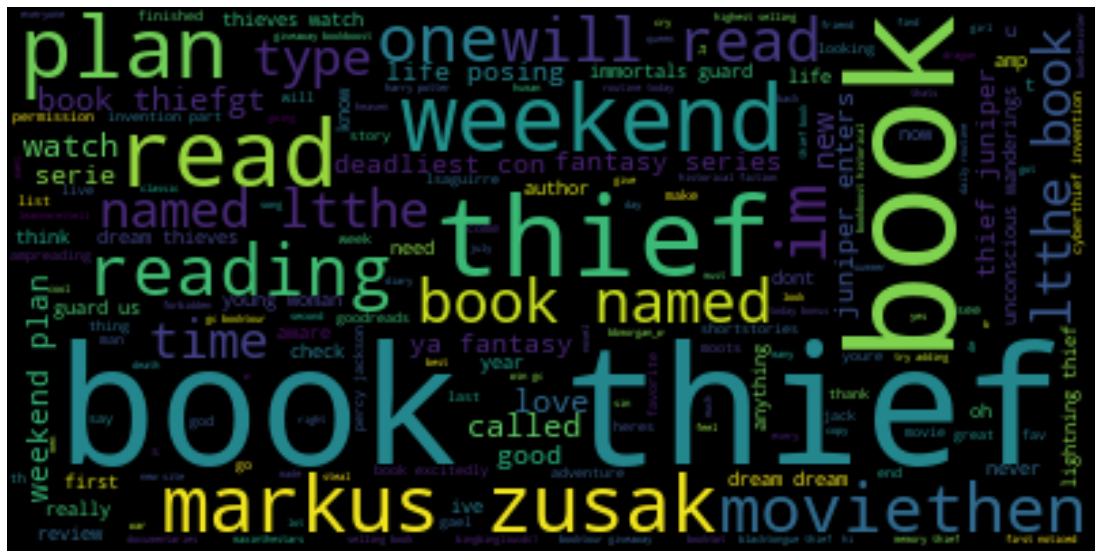

In [61]:
#CREER UNE LISTE DE LA TOTALITE DES TWEETS MOT PAR MOT
#saDataFrame[saDataFrame.ColonneTest.].colonneDesTweets
text = df_book_thief[df_book_thief.Test=='2021'].Tweets.tolist() 

#METTRE TOUS LES MOTS EN MINUSCULE
text = ' '.join(text).lower()

#CODE POUR LE NUAGE DE MOTS
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#AFFICHER LE NUAGE DE MOTS
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [81]:
#CREATION D'UN TABLEAU FREQUENCE/TRIGRAMMES
from sklearn.feature_extraction.text import CountVectorizer

#ngram_range= (2,2)Pour les bigrammes, (2,3)Pour les bigrammes et trigrammes, (3,3)Pour les trigrammes
c_vec = CountVectorizer(ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_book_thief['Tweets'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram_book_thief = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})
df_ngram_book_thief = df_ngram_book_thief.head(25)
df_ngram_book_thief

,frequency,trigram
0,279,the book thief
1,70,this weekend plan
2,68,weekend plan to
3,68,plan to watch
4,68,at this weekend
5,43,book thief by
6,40,will read book
7,40,type of moviethen
8,40,read book named
9,40,of moviethen will


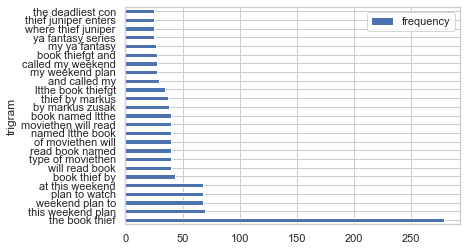

In [98]:
book_thief_bplot = pd.DataFrame(df_ngram_book_thief)
ax = book_thief_bplot.plot.barh(x='trigram', y='frequency', rot=0)